<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/Auto_Encoders_20MAI0026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



***Name:*** *Jency Infancia Mary J*

***Roll No:*** *20MAI0026*

***Experiments:***

**[Activity 1: ](https://github.com/Jency07/Deep-learning-lab/blob/main/Auto-Encoders_20MAI0026.ipynb)** *Auto-Encoders Implementation*



















### **1.Auto-Encoders Implementation**

***1.Importing Libraries***

In [13]:
#import packages
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add, Layer
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

***2.Loading Dataset***

In [21]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)



***3.Normalizing Data***

In [22]:
print("20MAI0026")
print("\n")
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

20MAI0026


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [23]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

***4.Creating network***

In [24]:
input_size = 784
hidden_size = 64
output_size = 784

In [25]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

***5.Training Model***

In [26]:
iepochs = 5
batch_size = 128
print("20MAI0026")
print("\n")
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

20MAI0026


Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0751 - val_loss: 0.0222
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0197 - val_loss: 0.0127
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0118 - val_loss: 0.0087
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0064 - val_loss: 0.0055


***6.Testing Model***

In [27]:
decoded_imgs = autoencoder.predict(X_test)

***7.Model Output***

20MAI0026


dict_keys(['loss', 'val_loss'])


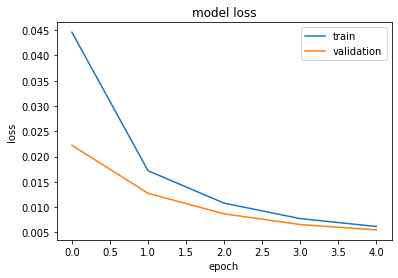

In [28]:
print("20MAI0026")
print("\n")

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()